<a href="https://colab.research.google.com/github/moamenkhalaf97/code/blob/main/DL01_CNN_PyTorch_EyeNose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![visioncolab](https://drive.google.com/uc?export=view&id=10UMKqKSnU2grmitxYxvL7V6GVMu8RrpP)


`Google colab's for image processing, pattern recognition and computer vision`

[Domingo Mery](https://domingomery.ing.puc.cl/) - Department of Computer Science - Universidad Católica de Chile

# Classification of Eyes and Noses

A Toy example:

Two-class problem: grayscale images of 32x32 pixels of eyes and noses.

In [ ]:
!wget https://www.dropbox.com/s/vrrur8trlxi91p9/eyenose.zip
!unzip -qq eyenose.zip

--2024-06-12 15:39:03--  https://www.dropbox.com/s/vrrur8trlxi91p9/eyenose.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /scl/fi/cqhtrxeqkss680c3okpt7/eyenose.zip?rlkey=cm99xdp3d4d9r5whjbvifkliv [following]
--2024-06-12 15:39:04--  https://www.dropbox.com/scl/fi/cqhtrxeqkss680c3okpt7/eyenose.zip?rlkey=cm99xdp3d4d9r5whjbvifkliv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc85b21a5eaa383c5080bd22c14.dl.dropboxusercontent.com/cd/0/inline/CUvLKhVihfN38zN6x41JUmmz7zzc0qY-DxH5Ls8B_IOJ4XbRode8wxNC3VYnunSXQb4IspOlW0erqLVkXJC1hV0n3k9wYT4qFNIxBtN5eUzGtGWC8a1dz-95no6CP0snzc0/file# [following]
--2024-06-12 15:39:04--  https://ucc85b21a5eaa383c5080bd22c14.dl.dropboxusercontent.com/cd/0/inline/CUvLKhVihfN38zN6x41JUmmz7zzc0qY-DxH5Ls8B_IOJ4

In [ ]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train and test data directory
train_dir = "eyenose/train"
test_dir  = "eyenose/test"

#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 32, 32])
   Classes:  ['eye', 'nose']


In [ ]:
!wget https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
from cnn_utils import *
print('cnn_utils module has been loaded')

--2024-06-12 15:39:14--  https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /scl/fi/bxa3643c4ntgc3d4zjwj7/cnn_utils.py?rlkey=0a74yhz3rmfcfs58gkxzlkze8 [following]
--2024-06-12 15:39:15--  https://www.dropbox.com/scl/fi/bxa3643c4ntgc3d4zjwj7/cnn_utils.py?rlkey=0a74yhz3rmfcfs58gkxzlkze8
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucac1c98335edad52143bcf18ff0.dl.dropboxusercontent.com/cd/0/inline/CUvn_BTIyMFZOR0qGuJeSinE_1Tcclsz0xtpjDfJ2K5o7cZ9D8KZkM3KOVPsxvo8W119zkRGUTL8n0JaXkDlpnI00RaZ_b-B8_9EWuro3QIXFAtE2JYZV4CmrnYzIAwtRMU/file# [following]
--2024-06-12 15:39:16--  https://ucac1c98335edad52143bcf18ff0.dl.dropboxusercontent.com/cd/0/inline/CUvn_BTIyMFZOR0qGuJeSinE_1Tcclsz0xtpjDfJ2K

Image: 1535, Label : eye


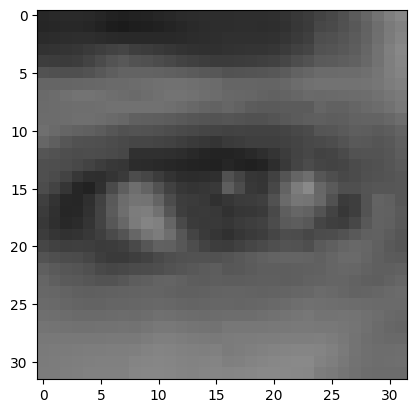

In [ ]:
#display an image in the training dataset
display_img(train_set,1535)

In [ ]:
batch_size = 40
val_size   = 960
train_size = len(train_set) - val_size

train_data,val_data = random_split(train_set,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_data, 2*batch_size, num_workers = 4, pin_memory = True)

Length of Train Data : 7360
Length of Validation Data : 960


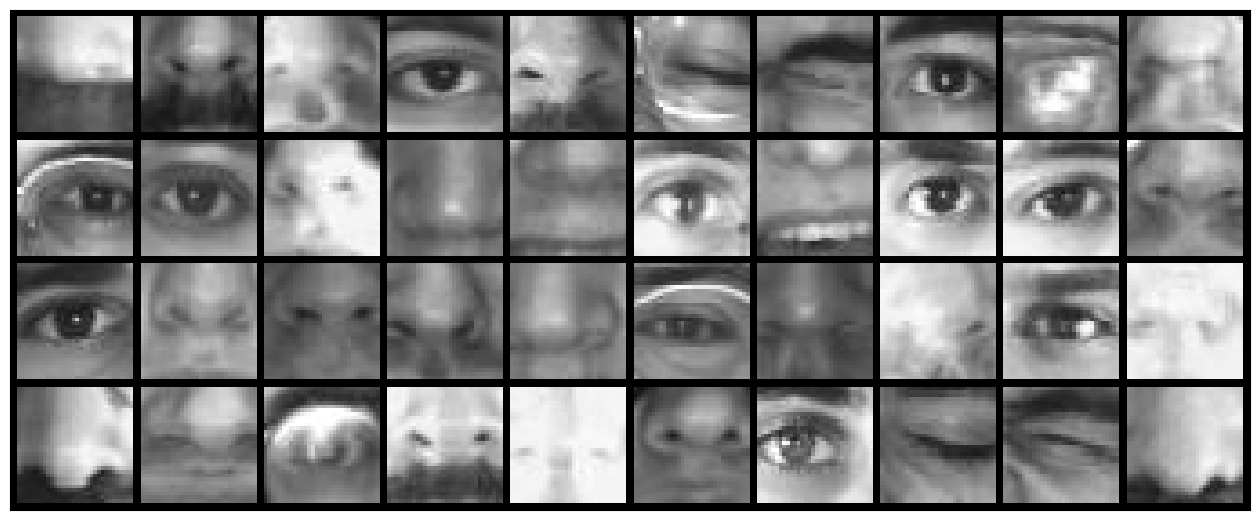

In [ ]:
show_batch(train_dl,nrow=10)

In [ ]:
# New architecture definition (equivalent to previous cell)
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(in_channels=3, out_channels=4, kernel_size = 5, stride = 1, padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size = 5, stride = 6, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(32,2),
            nn.Dropout(0.25)
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(6, 6))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=32, out_features=2, bias=True)
    (7): Dropout(p=0.25, inplace=False)
  )
)


In [ ]:
#fitting the model on training data and record the result after each epoch
num_epochs = 50
opt_func   = torch.optim.Adam
lr         = 0.005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.2878      0.0842      0.9719    ***       1.9 
    1      0.1349      0.1426      0.9542              1.9 
    2      0.1241      0.0480      0.9792    ***       1.7 
    3      0.1017      0.0538      0.9823    ***       1.7 
    4      0.1053      0.0455      0.9823              1.7 
    5      0.0914      0.0822      0.9729              1.8 
    6      0.1004      0.0365      0.9885    ***       1.7 
    7      0.1031      0.0296      0.9906    ***       1.7 
    8      0.1069      0.0289      0.9906    ***       1.7 
    9      0.0930      0.0409      0.9823              1.8 
   10      0.0872      0.0339      0.9875              1.7 
   11      0.0962      0.0289      0.9896              1.7 
   12      0.0938      0.0480      0.9812              1.6 
   13      0.0878      0.0332      0.9865              1.7 
   14      0.0933      0.0417 

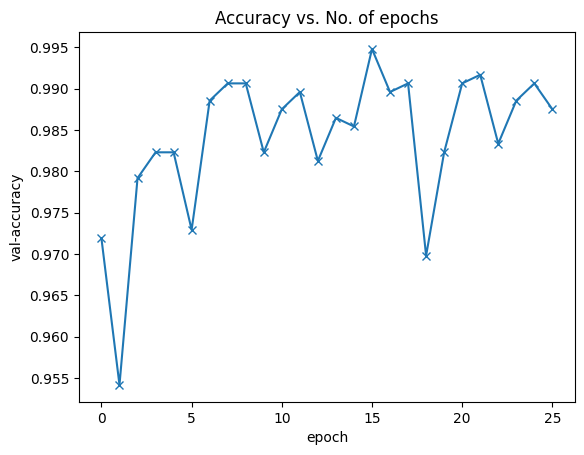

In [ ]:
plot_accuracies(history)

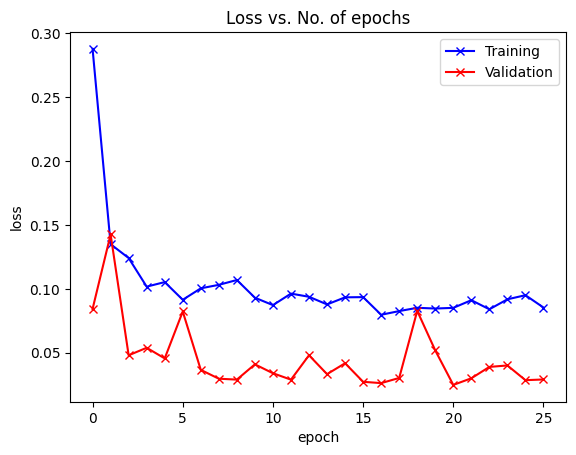

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.9913461538461539
 
Confusion Matrix = 
[[1029   11]
 [   7 1033]]


Confusion Matrix:
[[1029   11]
 [   7 1033]]
Accuracy = 99.13


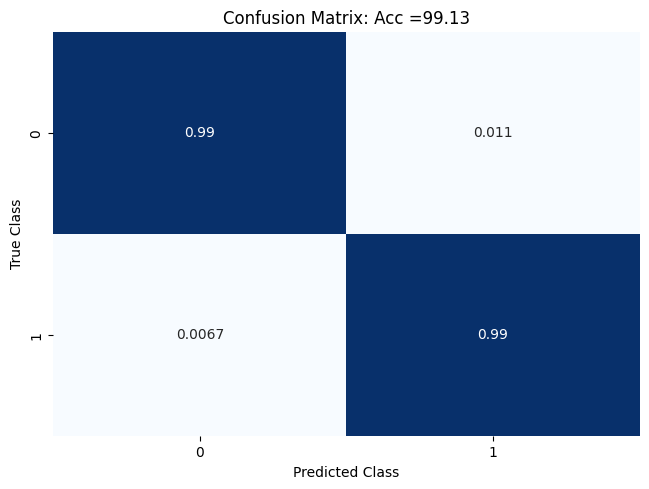

In [ ]:
print_confusion(ytest,ypred,show_heatmap=1,Cnorm=1040)

In [ ]:
C1,acc1 = performance(model,train_data,'Training')
C2,acc2 = performance(model,val_data,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[3664   27]
 [  80 3589]]
 
Training Accuracy = 0.9855
 
Validation Confusion Matrix = 
[[467   2]
 [  3 488]]
 
Validation Accuracy = 0.9948
 
Testing Confusion Matrix = 
[[1029   11]
 [   7 1033]]
 
Testing Accuracy = 0.9913
 
